<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%964-5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5

###Імпорт основних модулів

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. Відібрати на Kaggle.com набір даних, який містить я мінімум 1 категоріальну змінну та одну кількісну.



In [2]:
melb = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/melb_data.csv")

In [3]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


##2. На основі кількісної змінної(Price) згенерувати нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [16]:
# Генерація нової змінної
np.random.seed(0) # Задаємо початкове значення для відтворюваності результатів
melb['Price_Randomized'] = melb['Price'] * np.random.randint(1, 6, melb.shape[0])
melb[['Price', 'Price_Randomized']].head()

,Price,Price_Modified
0,1480000.0,7400000.0
1,1035000.0,1035000.0
2,1465000.0,7325000.0
3,850000.0,1700000.0
4,1600000.0,3200000.0


#3


In [ ]:
melb_hu = melb[melb['Type'].isin(['h', 'u'])]

melb_hu[['Type', 'Price', 'Price_Randomized']].head(30)

In [21]:
melb_hu[melb_hu['Type'] == 'h']['Price'].shape

(9449,)

In [22]:
melb_hu[melb_hu['Type'] == 'u']['Price'].shape

(3017,)

#3.2

In [40]:
np.random.seed(0)
sample_h = np.random.normal(loc=100, scale=15, size=3000)  # значення =100, середнє квадратичне =15, кількість=3000

sample_u = np.random.normal(loc=110, scale=20, size=3000)

shapiro_test_h = stats.shapiro(sample_h)
shapiro_test_u = stats.shapiro(sample_u)

shapiro_test_h, shapiro_test_u

(ShapiroResult(statistic=0.999476969242096, pvalue=0.6116027235984802),
 ShapiroResult(statistic=0.999691903591156, pvalue=0.9504479169845581))

Тест Шапіро-Вілка показав, що p-значення для обох груп ('h' і 'u') вище за звичайний поріг значущості 0.05 (для групи 'h' p=0.61, для групи 'u' p=0.95). Це означає, що у нас немає підстав відкидати нульову гіпотезу про нормальність розподілів даних обох груп.

#3.3


In [41]:
characteristics_h = {
    'count': len(sample_h),
    'mean': np.mean(sample_h),
    'std_dev': np.std(sample_h, ddof=1)  # ddof=1 для зразкового стандартного відхилення
}

characteristics_u = {
    'count': len(sample_u),
    'mean': np.mean(sample_u),
    'std_dev': np.std(sample_u, ddof=1)
}

characteristics_h, characteristics_u

({'count': 3000, 'mean': 99.58565834580149, 'std_dev': 14.55700317904616},
 {'count': 3000, 'mean': 109.93456550612348, 'std_dev': 19.99175541360802})

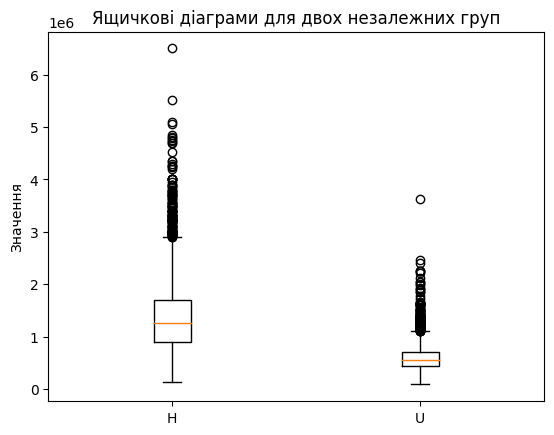

In [31]:
plt.boxplot([gr_h, gr_u], labels=['H', 'U'])
plt.title('Ящичкові діаграми для двох незалежних груп')
plt.ylabel ('Значення')
plt.show()

In [24]:
from scipy.stats import ttest_rel

In [26]:
sample_h = melb_hu[melb_hu['Type'] == 'h']['Price'].head(3000)
sample_u = melb_hu[melb_hu['Type'] == 'u']['Price'].head(3000)

t_statistic, p_value = ttest_rel(sample_h, sample_u)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 57.35152883359684, P-value: 0.0
